<a href="https://colab.research.google.com/github/hajer3bdullah70/AI_KAUST/blob/main/day1_linearregression_kaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

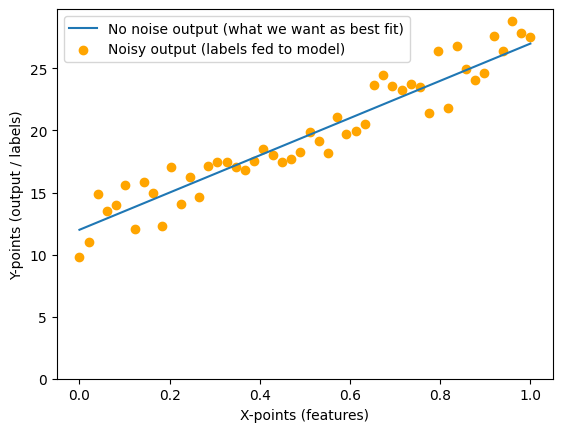

In [ ]:
#y = w0 + w1*x1
w0=12
w1=15
noise_scale_factors=5
num_points=50

x_points=np.linspace(0, 1, num_points)
y_points_no_noise = w0 + w1*x_points
noise = noise_scale_factors * (np.random.rand(*y_points_no_noise.shape)-0.5)

y_points = y_points_no_noise + noise

plt.plot(x_points, y_points_no_noise, label='No noise output (what we want as best fit)')
plt.scatter(x_points, y_points, c="Orange", label='Noisy output (labels fed to model)')
_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top)  # 0 bottom makes it easy to visualize bias term

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()


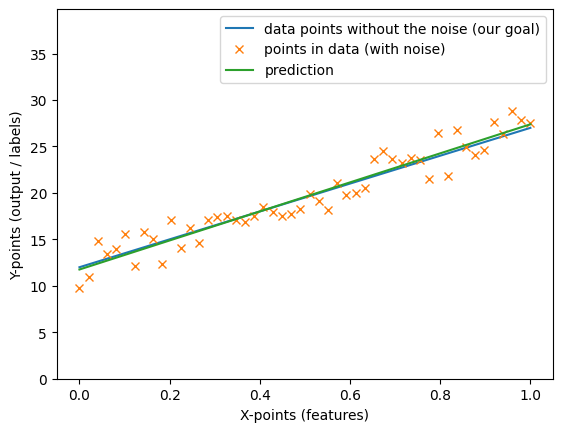

In [ ]:
# Custom calculating best fit

num_bases = 1  # number of coefficient to polynomial terms (not including bias). We'll pick 1 since our original function had highest order term of 1

A = [x_points**i for i in range(num_bases+1)]  # +1 in num_bases for bias
A = np.array(A).T  # (m, n) matrix where m is number of samples and n is number of params (including bias). In our case, n is 2


# Solve for w to find our params
# Upper case: matrices. Lower case: vectors

#  Aw = y
#  Aᵀ(Aw) = Aᵀy  =>  AᵀAw = Aᵀy
#  w = (AᵀA)⁻¹Aᵀy

# Hint: Remember how we use matrix multiplication (@) and inverse (np.linalg.inv)
# to find the optimal weights in linear regression.
### TODO
w = (np.linalg.inv) (A.T @ A) @  A.T  @ y_points



# This line calculates the predicted values 'y_pred' using the matrix 'A' and the weights 'w'.
### TODO
y_pred = A @ w




# Visualize the results

plt.plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
plt.plot(x_points, y_points, 'x', label='points in data (with noise)')
plt.plot(x_points, y_pred, label='prediction')

_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top+10)  # 0 bottom makes it easy to visualize bias term (intercept)

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

In [ ]:
print(f'Actual weight values we used: {(w0, w1)}')
print(f'Values calculated by Model: {tuple(w)}')

Actual weight values we used: (12, 15)
Values calculated by Model: (11.754431384857874, 15.626572763267173)


In [ ]:
model = LinearRegression(fit_intercept=True)
model = model.fit(x_points.reshape(-1, 1), y_points)  # fit is used to train the model on the data.

In [ ]:
y_pred = model.predict(x_points.reshape(-1, 1))  # Predict is used to prediction labels/outputs from feature inputs.

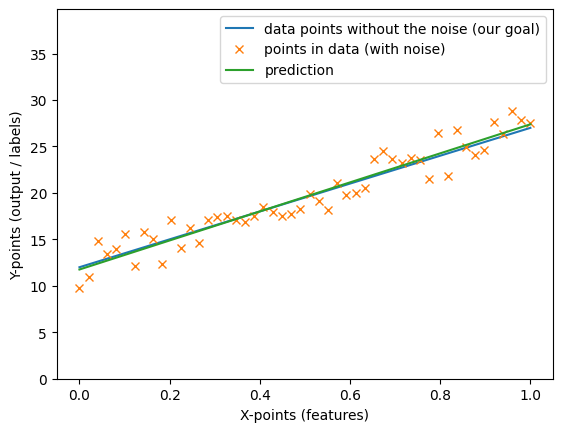

In [ ]:
plt.plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
plt.plot(x_points, y_points, 'x', label='points in data (with noise)')
plt.plot(x_points, y_pred, label='prediction')

_, ylim_top = plt.ylim()
plt.ylim(0, ylim_top+10)
plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

In [ ]:
print(f'Expected coefficients/matrices:           {(w0, w1)}')

# we have to do [0] on coef_ because coef_ itself is a matrix of all the coeffifients. In our case, coef_ just has one length but it's still an array.
# [0] brings out the value from array which means better printing
print(f'Sklearn calculated coeffidients/matrices: {(model.intercept_, model.coef_[0])}')

Expected coefficients/matrices:           (12, 15)
Sklearn calculated coeffidients/matrices: (11.754431384857874, 15.626572763267163)


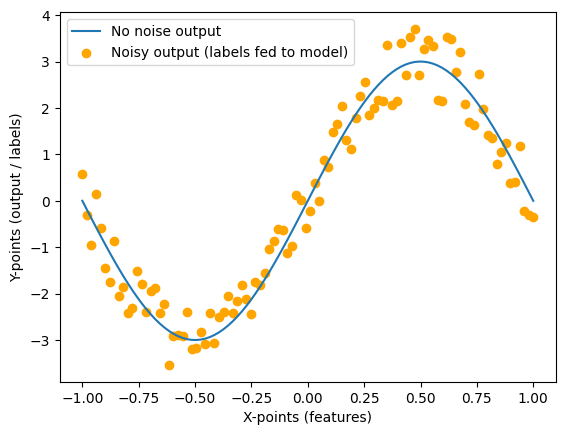

In [ ]:
noise_scale_factor = 1.5
num_points = 100
sin_wave_ub = 3  # upper bound of sin wave y output. negative of this value would also be lower bound. (negative value here would make this a cosine wave)

x_points = np.linspace(-1, 1, num_points)
y_points_no_noise = sin_wave_ub * np.sin(x_points*math.pi)

noise = noise_scale_factor * (np.random.rand(*y_points_no_noise.shape)-0.5)
y_points = y_points_no_noise + noise

plt.plot(x_points, y_points_no_noise, label='No noise output')
plt.scatter(x_points, y_points, c = "orange",label='Noisy output (labels fed to model)')

plt.xlabel('X-points (features)')
plt.ylabel('Y-points (output / labels)')

plt.legend()
plt.show()

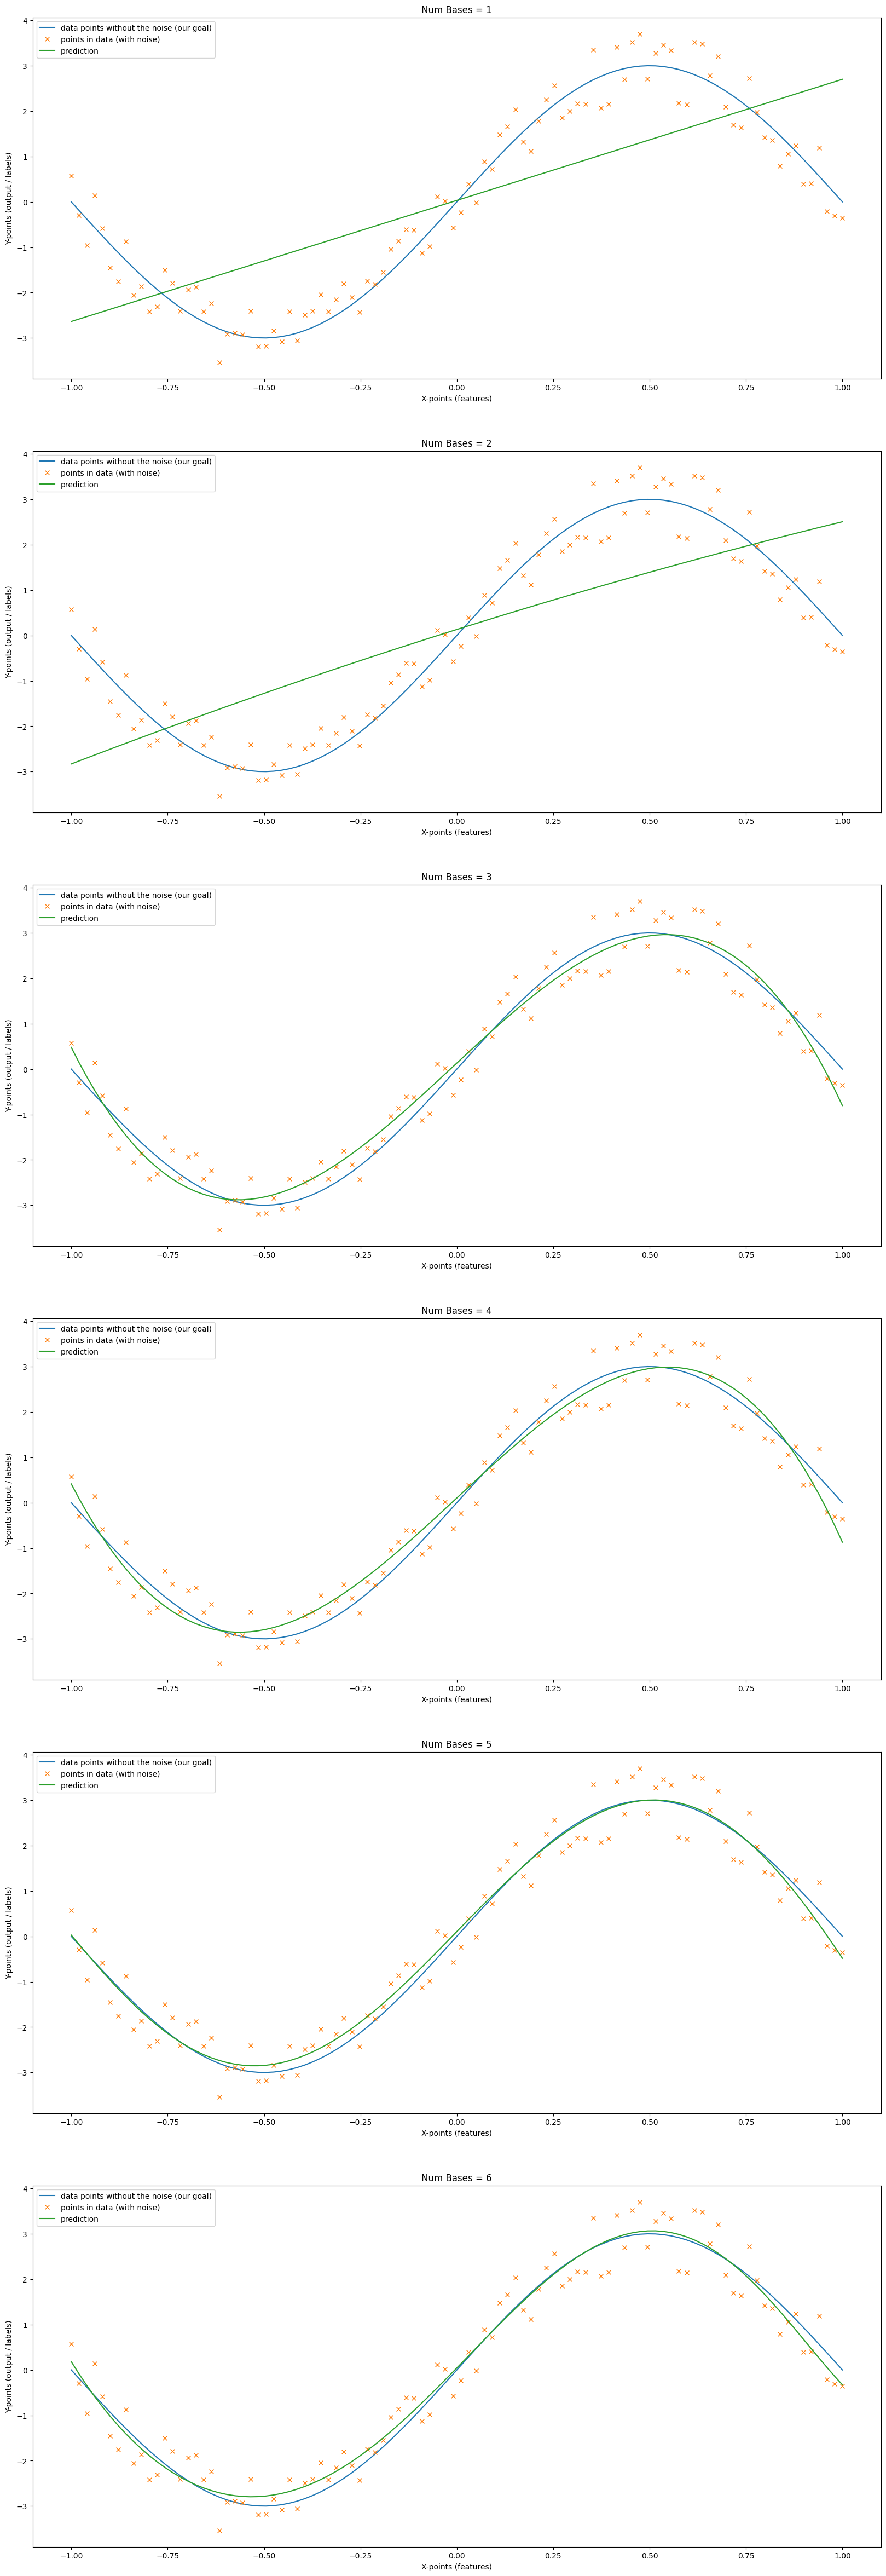

In [ ]:
# Custom calculating best fit


min_num_bases = 1
max_num_bases = 6


assert min_num_bases <= max_num_bases, "min_num_bases must be lesser or equal to max_num_bases. :|"

bases_preds = []

for num_bases in range(min_num_bases, max_num_bases+1):

  A = [x_points**i for i in range(num_bases+1)]
  A = np.array(A).T

  # Solve for w to find our params
  # Upper case: matrices. Lower case: vectors

  #  Aw = y
  #  Aᵀ(Aw) = Aᵀy  =>  AᵀAw = Aᵀy
  #  w = (AᵀA)⁻¹Aᵀy




  # Hint: Consider how the transpose of matrix 'A' and the inverse function play a role
  # in finding the optimal weights 'w'. This is a key step in minimizing the cost function.
  ### TODO
  w = (np.linalg.inv) (A.T @ A) @  A.T  @ y_points




  # Now that we have our weights, this line is used to make predictions.
  # Hint: Reflect on how matrix multiplication here helps in applying the learned
  # weights 'w' to our feature matrix 'A' to predict the output 'y_pred'.
  ### TODO
  y_pred = A @ w




  bases_preds.append(y_pred)


fig, axes = plt.subplots(len(bases_preds), 1, figsize=(20, 10*len(bases_preds)))

for i, (num_bases, preds) in enumerate(zip(range(min_num_bases, max_num_bases+1), bases_preds)):

    axes[i].set_title(f'Num Bases = {num_bases}')

    # Visualize the results
    axes[i].plot(x_points, y_points_no_noise, label='data points without the noise (our goal)')
    axes[i].plot(x_points, y_points, 'x',     label='points in data (with noise)')
    axes[i].plot(x_points, bases_preds[i],    label='prediction')

    axes[i].set_xlabel('X-points (features)')
    axes[i].set_ylabel('Y-points (output / labels)')

    axes[i].legend()

plt.show()